# Decision Tree Pruning Tutorial
This notebook demonstrates pre-pruning and post-pruning techniques on a classification task using a Decision Tree.

## Step 1: Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text


## Step 2: Load and Explore the Dataset

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.shape, y.shape

((569, 30), (569,))

## Step 3: Split the Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 4: Decision Tree without Pruning

In [5]:
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)
y_pred_full = tree_full.predict(X_test)
print("Accuracy (Unpruned):", accuracy_score(y_test, y_pred_full))

Accuracy (Unpruned): 0.9415204678362573


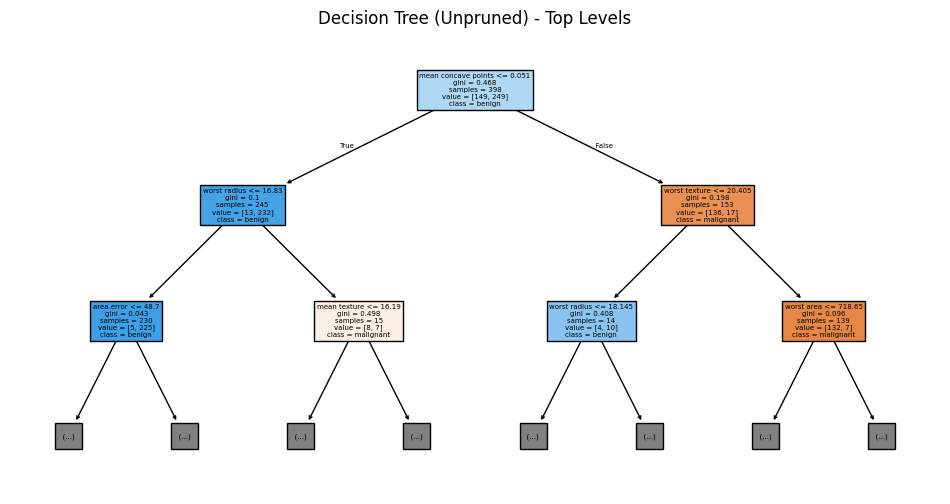

In [6]:
plt.figure(figsize=(12, 6))
plot_tree(tree_full, filled=True, max_depth=2, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree (Unpruned) - Top Levels")
plt.show()

## Step 5: Pre-Pruned Tree

In [7]:
tree_pre = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)
tree_pre.fit(X_train, y_train)
y_pred_pre = tree_pre.predict(X_test)
print("Accuracy (Pre-Pruned):", accuracy_score(y_test, y_pred_pre))

Accuracy (Pre-Pruned): 0.9590643274853801


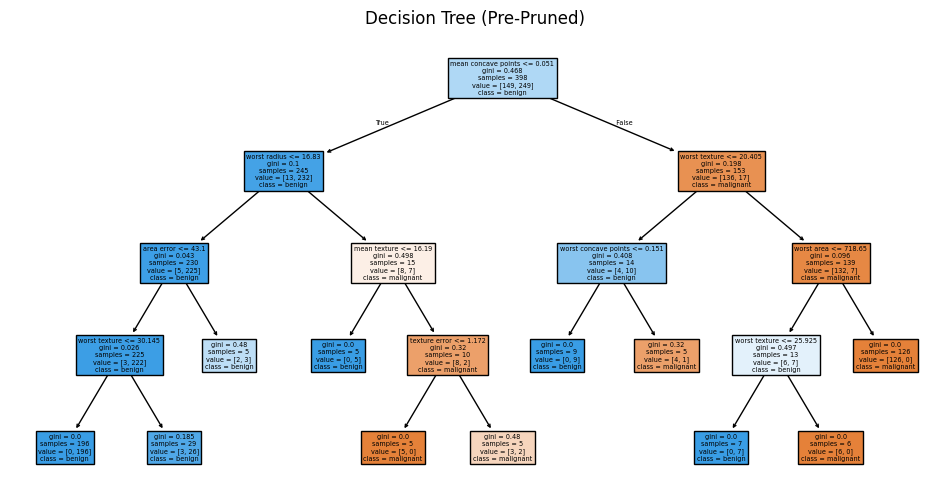

In [8]:
plt.figure(figsize=(12, 6))
plot_tree(tree_pre, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree (Pre-Pruned)")
plt.show()

## Step 6: Post-Pruned Tree using Cost Complexity Pruning

In [9]:
path = tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

trees = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)

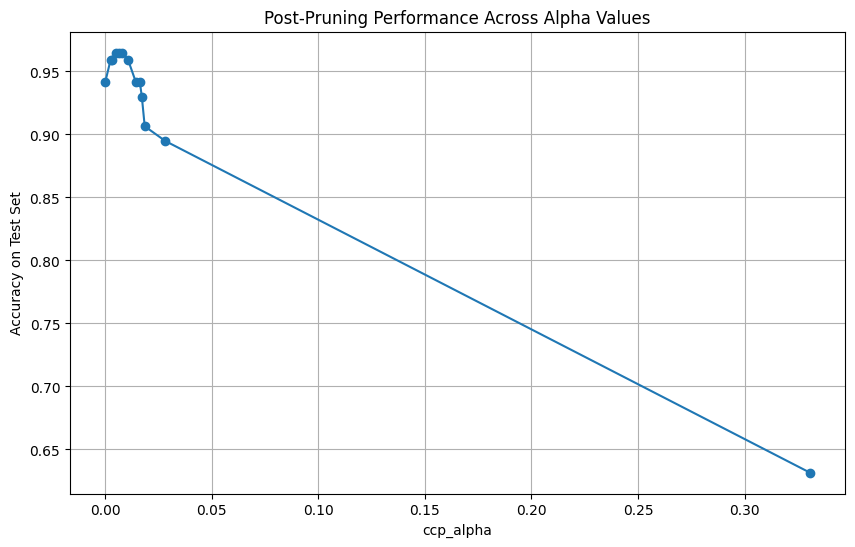

In [10]:
test_scores = [accuracy_score(y_test, tree.predict(X_test)) for tree in trees]
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, test_scores, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy on Test Set")
plt.title("Post-Pruning Performance Across Alpha Values")
plt.grid(True)
plt.show()

In [11]:
best_alpha_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_alpha_index]
tree_post = trees[best_alpha_index]
print("Best alpha:", best_alpha)
print("Accuracy (Post-Pruned):", accuracy_score(y_test, tree_post.predict(X_test)))

Best alpha: 0.0049148318490037
Accuracy (Post-Pruned): 0.9649122807017544


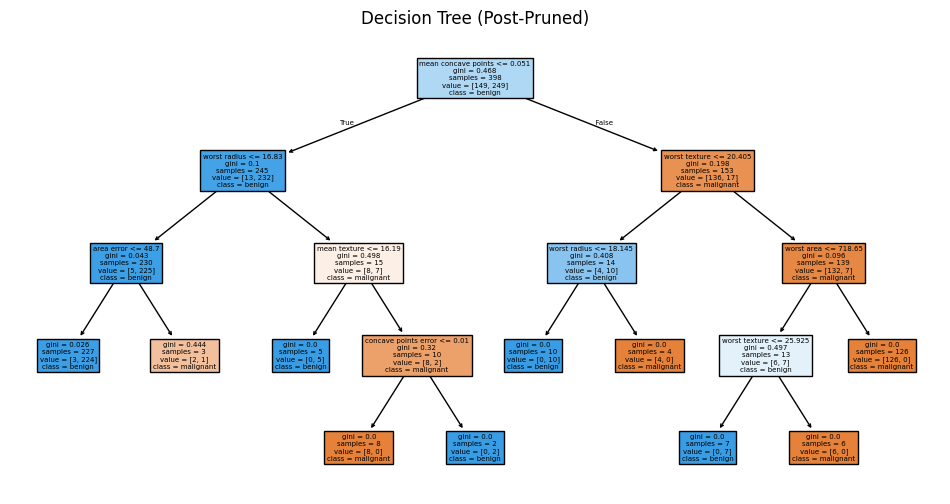

In [12]:
plt.figure(figsize=(12, 6))
plot_tree(tree_post, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree (Post-Pruned)")
plt.show()